## Plot cross sections for different hadronic interaction models in MCEq

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mceq_config as config
from MCEq.core import MCEqRun
import crflux.models as pm
import scienceplots
import scipy.optimize as opt
from MCEq.data import InteractionCrossSections

In [2]:
#initialize mceq

mceq = MCEqRun(
        interaction_model="SIBYLL2.3c",
        theta_deg=0.0,
        primary_model=(pm.HillasGaisser2012, "H4a"),
    )

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a


In [6]:
int_models = ["SIBYLL2.3c","EPOSLHC","QGSJet-II-03","DPMJET-III-3.0.6"]
particle = [211,321,2212] # pion, kaon, proton
cs = np.ndarray(shape=(len(particle),len(int_models),len(mceq.e_grid)),dtype= float)

for i in range(len(int_models)):
    for p in range(len(particle)):
        cs[p][i] = InteractionCrossSections(mceq._mceq_db, interaction_model=int_models[i]).get_cs(particle[p], mbarn=True)

In [7]:
plot_dir = "/home/khymon/Plots/cs-analysis/"

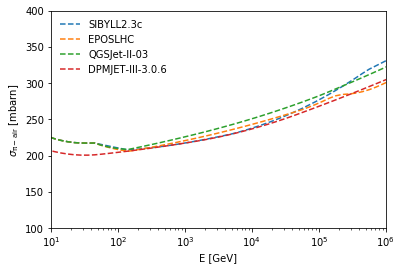

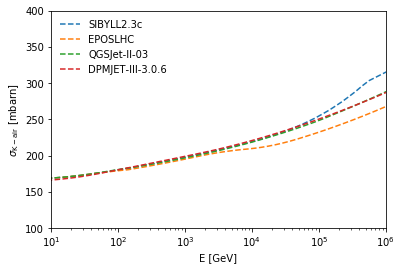

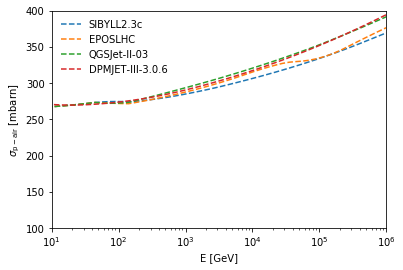

<Figure size 432x288 with 0 Axes>

In [8]:
label = [r"$\sigma_{\rm \pi -air}$ [mbarn]",r"$\sigma_{\rm K-air}$ [mbarn]",r"$\sigma_{\rm p-air}$ [mbarn]"]

for p in range(len(particle)):
    for i in range(len(int_models)):

        plt.semilogx(mceq.e_grid, cs[p][i], label=int_models[i],ls='--')


    plt.legend(frameon=False)
    plt.xlim(10, 1e6)
    plt.ylim(100,400)
    plt.xlabel("E [GeV]")
    plt.ylabel(label[p])
    plt.savefig(plot_dir + "cs_interactionmodel_ptype" + str(particle[p]) +".png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.clf()

/home/khymon/software/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/khymon/software/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


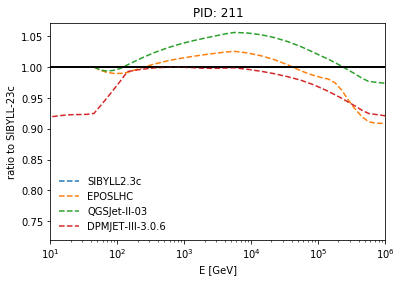

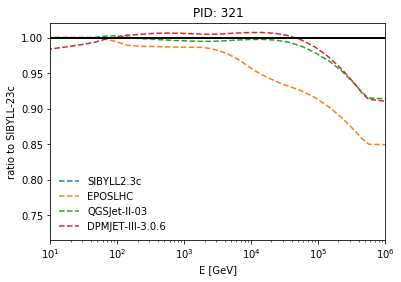

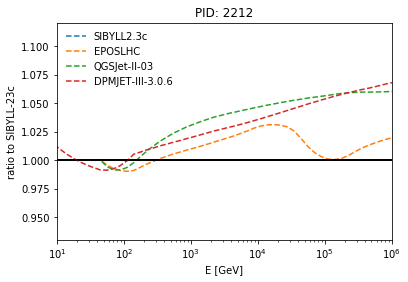

In [9]:
# deviation from Sibyll23c


for p in range(len(particle)):
    for i in range(len(int_models)):

        plt.semilogx(mceq.e_grid, cs[p][i]/cs[p][0], label=int_models[i],ls='--')
        plt.semilogx(mceq.e_grid, cs[p][0]/cs[p][0], color='black',ls='-')
        plt.title('PID: ' + str(particle[p]) )


    plt.legend(frameon=False)
    plt.xlim(10, 1e6)
    
    plt.xlabel("E [GeV]")
    plt.ylabel('ratio to SIBYLL-23c')
    plt.savefig(plot_dir + "cs_interactionmodel_devfromsibyll23c_ptype" + str(particle[p]) +".png", dpi=300, bbox_inches="tight")
    plt.show()